# Demo
## Vortex dynamics

In this example, we are going to simulate vortex core dynamics. After creating a vortex structure, we are first going to displace it by applying an external magnetic field. We will then turn off the external field, and compute the time-development of the system, and then be able to see the dynamics of the vortex core.

The sample is a two-dimensional Permalloy square sample with $d=100 \,\text{nm}$ edge length and $5\,\text{nm}$ thickness. Its energy equation consists of ferromagnetic exchange, Zeeman, and demagnetisation energy terms:
    
$$E = \int_{V} \left[-A\mathbf{m}\cdot\nabla^{2}\mathbf{m} - \mu_{0}M_\text{s}\mathbf{m}\cdot\mathbf{H} + w_\text{d}\right] \text{d}V,$$

where $A = 13 \,\text{pJ}\,\text{m}^{-1}$ is the exchange energy constant, $M_\text{s} = 8 \times 10^{5} \,\text{A}\,\text{m}^{-1}$ magnetisation saturation, $w_\text{d}$ demagnetisation energy density, $\mathbf{H}$ an external magnetic field, and $\mathbf{m}=\mathbf{M}/M_\text{s}$ the normalised magnetisation field.

The magnetisation dynamics is governed by the Landau-Lifshitz-Gilbert equation consisting of precession and damping terms:

$$\frac{\partial\mathbf{m}}{\partial t} = -\frac{\gamma_{0}}{1+\alpha^{2}}\mathbf{m}\times\mathbf{H}_\text{eff} - \frac{\gamma_{0}\alpha}{1+\alpha^{2}}\mathbf{m}\times(\mathbf{m}\times\mathbf{H}_\text{eff}),$$

where $\gamma_{0} = 2.211 \times 10^{5} \,\text{m}\,\text{A}^{-1}\,\text{s}^{-1}$ and $\alpha = 0.2$ is the Gilbert damping.

The (initial) magnetisation field is a vortex state, whose magnetisation at each point $(x, y, z)$ in the sample can be represented as $(m_{x}, m_{y}, m_{z}) = (-cy, cx, 0.1)$, with $c = 10^{9} \text{m}^{-1}$.

In [1]:
import discretisedfield as df
import micromagneticmodel as mm

In [2]:
import pandas as pd
pd.options.display.max_rows = 5
pd.options.display.float_format = '{:,.2e}'.format

## System initialisation
The Ubermag cote for defining the micromagnetic system is:

In [3]:
# Geometry
L = 100e-9  # sample edge length (m)
thickness = 5e-9  # sample thickness (m)

# Material (Permalloy) parameters
Ms = 8e5  # saturation magnetisation (A/m)
A = 13e-12  # exchange energy constant (J/m)

# Dynamics (LLG equation) parameters
alpha = 0.2  # Gilbert damping

In [5]:
system = mm.System(name='vortex_dynamics')

# Energy equation. We omit Zeeman energy term because H=0.
system.energy = mm.Exchange(A=A) + mm.Demag()

# Dynamics equation
system.dynamics = mm.Precession(gamma0=mm.consts.gamma0) + mm.Damping(alpha=alpha)

In [6]:
# initial magnetisation state
def m_init(point):
    x, y, z = point
    c = 1e9  # (1/m)
    return (-c*y, c*x, 0.1)

# Sample's centre is placed at origin
region = df.Region(p1=(-L/2, -L/2, -thickness/2), p2=(L/2, L/2, thickness/2))
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 5e-9))

system.m = df.Field(mesh, dim=3, value=m_init, norm=Ms)

The system object is now defined and we can investigate some of its properties:

In [8]:
system.energy

Exchange(A=1.3e-11) + Demag()

In [9]:
system.dynamics

Precession(gamma0=221276.14872118403) + Damping(alpha=0.2)

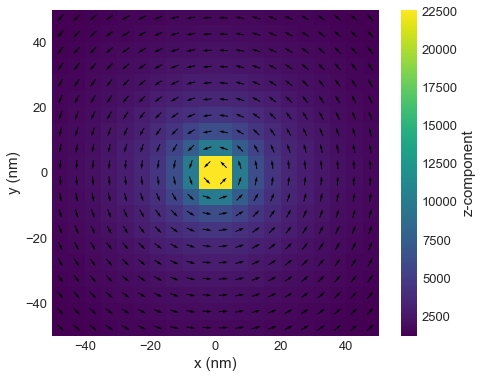

In [10]:
system.m.plane('z').mpl()

## Energy minimisation

Running OOMMF (ExeOOMMFRunner)[2022/03/07 12:55]... (0.5 s)


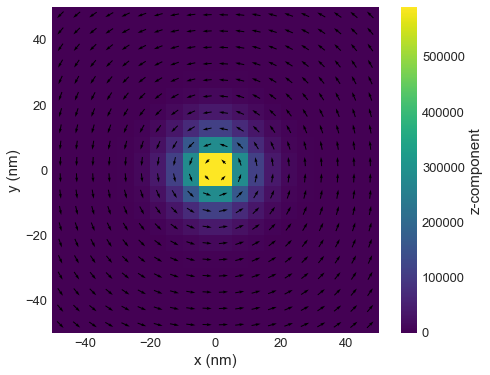

In [13]:
import oommfc as mc  # Micromagnetic Calculator

md = mc.MinDriver()
md.drive(system)

system.m.plane('z').mpl()